Análise de Dados com Python e Pandas

In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")



In [2]:
#Load files
df_aracaju = pd.read_excel("datasets/Aracaju.xlsx")
df_fortaleza = pd.read_excel("datasets/Fortaleza.xlsx")
df_natal = pd.read_excel("datasets/Natal.xlsx")
df_recife = pd.read_excel("datasets/Recife.xlsx")
df_salvador = pd.read_excel("datasets/Salvador.xlsx")

In [3]:
df_aracaju.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [4]:
df_fortaleza.sample(n=5)

,Cidade,Data,Vendas,LojaID,Qtde
19,Fortaleza,2019-01-01,18.86,1002,3
55,Fortaleza,2019-01-01,214.73,1002,4
106,Fortaleza,2019-01-01,28.42,1002,3
82,Fortaleza,2019-01-01,14.03,1004,5
13,Fortaleza,2019-02-12,118.58,1003,4


In [5]:
df_natal.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Natal,2019-01-03,41.84,1034,1
236,Natal,2019-01-03,126.29,1035,3
237,Natal,2019-01-03,38.06,1036,3
238,Natal,2019-01-03,139.64,1035,1
239,Natal,2019-01-03,161.41,1037,3


In [6]:
df = pd.concat([df_aracaju, df_fortaleza, df_natal, df_recife, df_salvador])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 239
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Cidade  894 non-null    object        
 1   Data    894 non-null    datetime64[ns]
 2   Vendas  894 non-null    float64       
 3   LojaID  894 non-null    int64         
 4   Qtde    894 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 41.9+ KB


In [8]:
df["LojaID"] = df["LojaID"].astype("object")

In [9]:
df["Receita"] = df["Vendas"]*df["Qtde"]

In [10]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


Checando valores faltantes 

In [11]:
df.isna().sum()

Cidade     0
Data       0
Vendas     0
LojaID     0
Qtde       0
Receita    0
dtype: int64

In [12]:
df.groupby("Cidade").Receita.min()

Cidade
Aracaju       3.34
Fortaleza    10.68
Natal         4.57
Recife        4.01
Salvador      4.57
Name: Receita, dtype: float64

In [13]:
df.groupby("Cidade").Receita.max()

Cidade
Aracaju      1837.12
Fortaleza    1462.00
Natal        3544.00
Recife       1913.36
Salvador      721.83
Name: Receita, dtype: float64

In [14]:
df.nlargest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


In [15]:
df.nsmallest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [16]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [17]:
#Agrupamento por Ano
df.groupby(df["Data"].dt.year)["Receita"].mean()

Data
2018    716.221394
2019    313.095267
Name: Receita, dtype: float64

In [18]:
df["Ano_Venda"] = df["Data"].dt.year

In [19]:
df["Mes_Venda"] = df["Data"].dt.month

In [20]:
df["Dia_Venda"] = df["Data"].dt.day

In [21]:
#Criando a coluna trimestre 
df["Trimestre_venda"] = df["Data"].dt.quarter

In [22]:
#Filtrando vendas 2018
vendas_marco_2018 = df.loc[(df["Ano_Venda"]==2018) & (df["Mes_Venda"]==4)]

In [23]:

vendas_marco_2018

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Trimestre_venda
24,Natal,2018-04-22,868.0,854,3,2604.0,2018,4,22,2
31,Natal,2018-04-03,401.0,854,4,1604.0,2018,4,3,2
52,Natal,2018-04-27,778.0,854,4,3112.0,2018,4,27,2


In [24]:
df["LojaID"].unique()

array([1520, 1522, 1521, 1523, 1002, 1004, 1003, 1005, 981, 982, 983, 980,
       853, 852, 854, 1036, 1035, 1037, 1034], dtype=object)

In [25]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

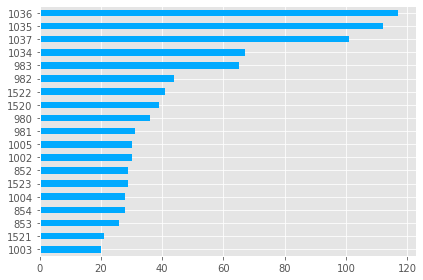

In [26]:
df["LojaID"].value_counts(ascending=True).plot.barh(color = "#00aaff")
plt.tight_layout()
plt.show()

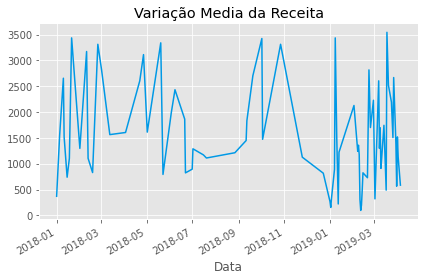

In [27]:
df.groupby(["Data"])["Receita"].mean().plot.line(color = "#0099e6",title="Variação Media da Receita")
plt.tight_layout()
plt.show()

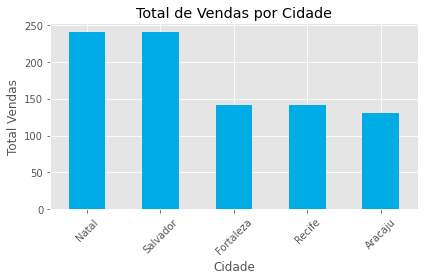

In [28]:
df["Cidade"].value_counts().plot.bar(color="#00ace6", title="Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

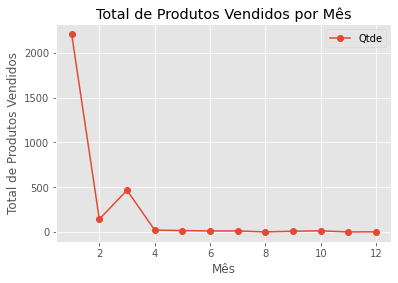

In [29]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(marker ="o",title="Total de Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()
plt.show()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

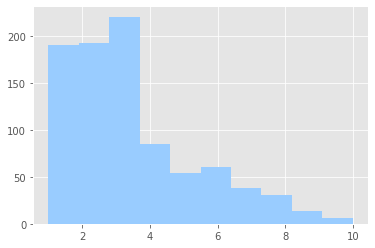

In [30]:
plt.hist(df["Qtde"], color = "#99ccff")

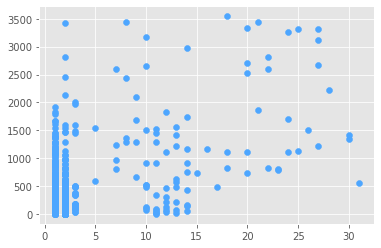

In [31]:
plt.scatter(x=df["Dia_Venda"], y = df["Receita"], color ="#4da6ff")